In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Loading the dataset

shopping_dataset = pd.read_csv('online_shoppers_intention.csv')
Shopping_dataset = shopping_dataset

In [3]:
# Define mappings
region_map = {
    1: "USA",
    2: "Canada",
    3: "Europe",
    4: "India",
    5: "China",
    6: "Brazil",
    7: "Australia",
    8: "Japan",
    9: "South Africa"
}

special_day_map = {
    0: "New Year's Day",
    0.2: "Valentine's Day",
    0.4: "Easter",
    0.6: "Independence Day",
    0.8: "Halloween",
    1: "Thanksgiving",
    
}

browser_map = {
    1: "Chrome",
    2: "Firefox",
    3: "Safari",
    4: "Edge",
    5: "Opera",
    6: "Internet Explorer",
    7: "Brave",
    8: "Vivaldi",
    9: "Samsung Internet",
    10: "DuckDuckGo Browser",
    11: "UC Browser",
    12: "QQ Browser",
    13: "Yandex Browser"
}

# Apply mappings to the columns
shopping_dataset['Region'] = shopping_dataset['Region'].map(region_map)
shopping_dataset['SpecialDay'] = shopping_dataset['SpecialDay'].map(special_day_map)
shopping_dataset['Browser'] = shopping_dataset['Browser'].map(browser_map)

# Display the first few rows to verify changes
shopping_dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,New Year's Day,Feb,1,Chrome,USA,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,New Year's Day,Feb,2,Firefox,USA,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,New Year's Day,Feb,4,Chrome,South Africa,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,New Year's Day,Feb,3,Firefox,Canada,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,New Year's Day,Feb,3,Safari,USA,4,Returning_Visitor,True,False


In [4]:
"""
Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

"""

"\nColumn Descriptions:\n\nAdministrative: This is the number of pages of this type (administrative) that the user visited.\n\nAdministrative_Duration: This is the amount of time spent in this category of pages.\n\nInformational: This is the number of pages of this type (informational) that the user visited.\n\nInformational_Duration: This is the amount of time spent in this category of pages.\n\nProductRelated: This is the number of pages of this type (product related) that the user visited.\n\nProductRelated_Duration: This is the amount of time spent in this category of pages.\n\nBounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.\n\nExitRates: The percentage of pageviews on the website that end at that specific page.\n\nPageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.\nMore information about how this is calculated\n\nSpe

In [5]:
shopping_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [6]:
print(u'- Number of rows: {}'.format(shopping_dataset.shape[0]))
print(u'- Number of columns: {}'.format(shopping_dataset.shape[1]))
print(u'- Name of independent variables: {}'.format(list(shopping_dataset.columns[:-1])))
print(u'- Name of target: {}'.format(list(shopping_dataset.columns[-1:])))
print(u'- Dataset shape:{}'.format(shopping_dataset.shape))

- Number of rows: 12330
- Number of columns: 18
- Name of independent variables: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
- Name of target: ['Revenue']
- Dataset shape:(12330, 18)


In [7]:
#checking for null values 

shopping_dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Describe the dataset
shopping_dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,2.124006,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.911325,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,2.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,2.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,3.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,8.000000,20.000000


In [9]:
# Checking for number of unique values for each feature

uniques = shopping_dataset.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


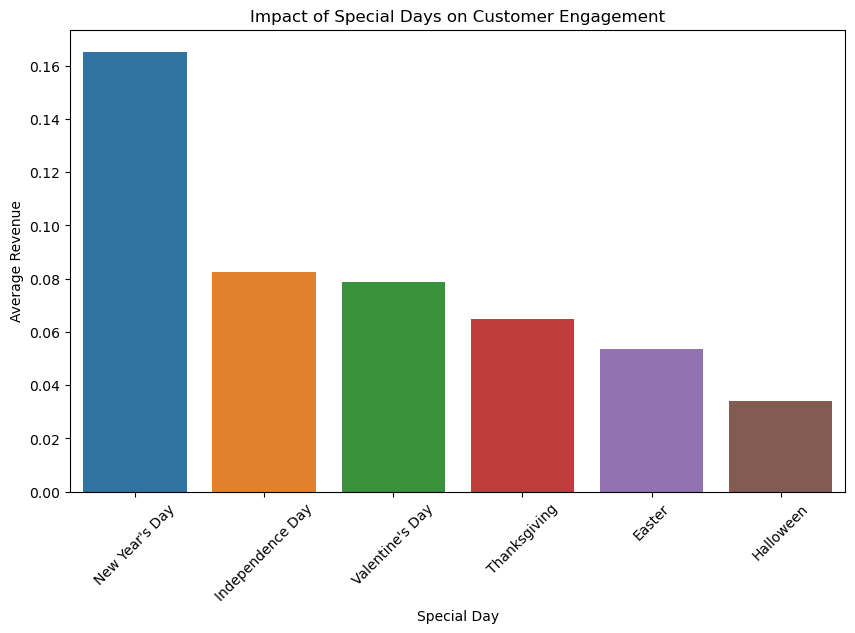

Special Days with the Highest Impact on Customer Engagement:
- New Year's Day: 0.16526762343171766
- Independence Day: 0.08262108262108261
- Valentine's Day: 0.07865168539325842


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = shopping_dataset.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" )
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  # Replace '3' with the desired number of top special days

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

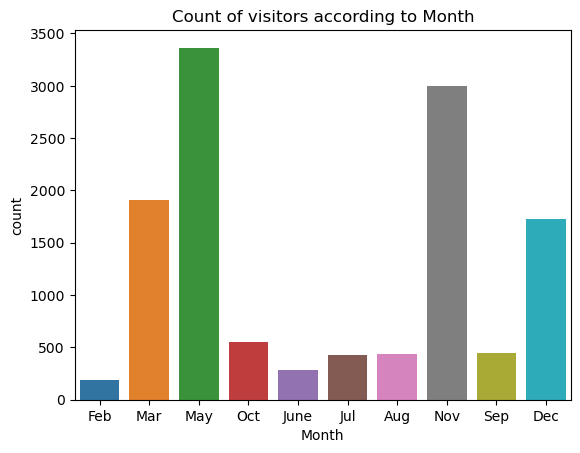

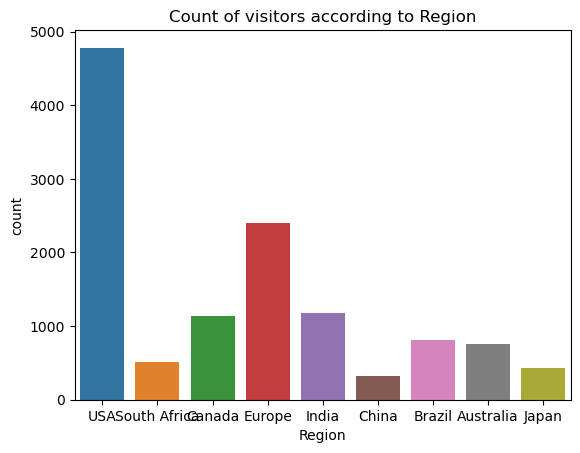

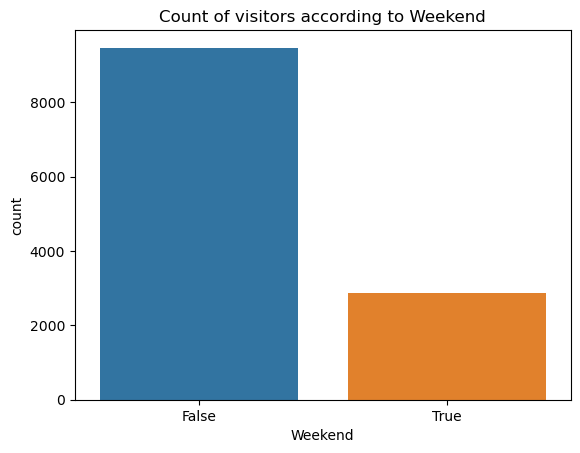

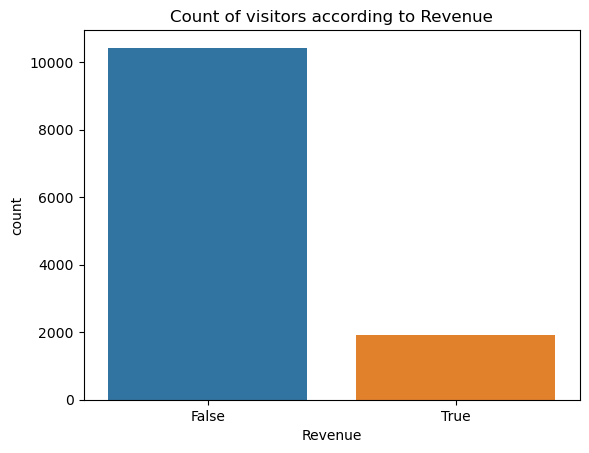

In [11]:
for i in ['Month', 'Region','Weekend', 'Revenue']:
    sns.countplot(data=shopping_dataset,x=i)
    plt.title(f'Count of visitors according to {i}')
    plt.show()

<Axes: ylabel='count'>

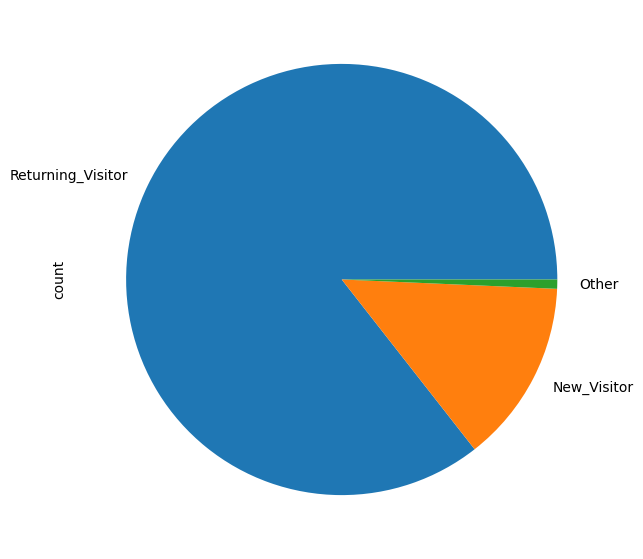

In [12]:
shopping_dataset.VisitorType.value_counts().plot.pie(y='VisitorType',figsize=(7,7))


<Axes: >

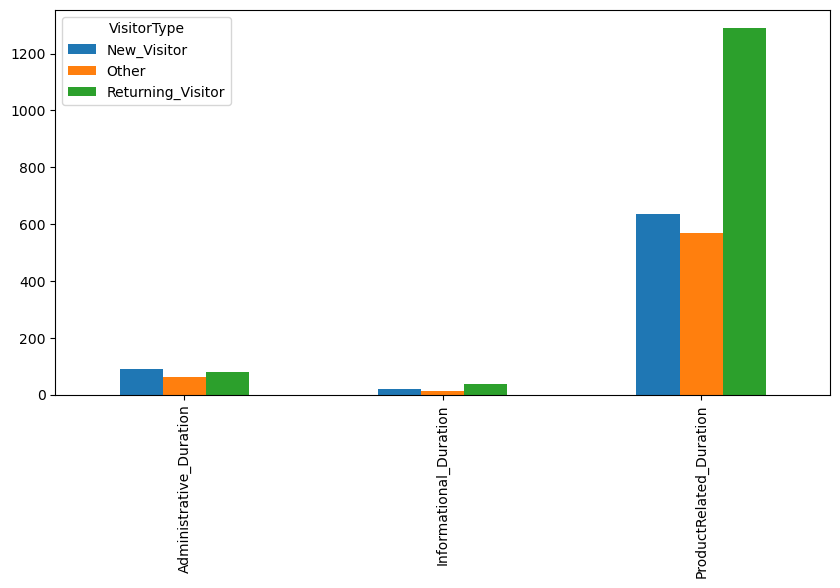

In [13]:
admin_dpt=shopping_dataset[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))

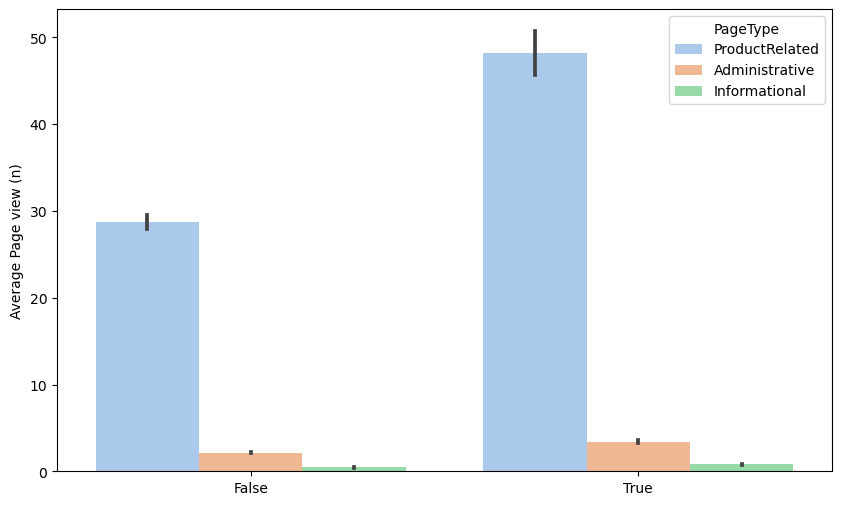

In [14]:
# Create melted df for make it easy to plot 
melted_df = shopping_dataset.melt(id_vars='Revenue', value_vars=[ 'ProductRelated', 'Administrative', 'Informational'],
                            var_name='PageType', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Revenue', y='Value', hue='PageType', palette='pastel')
plt.xlabel('')
plt.ylabel('Average Page view (n)')
plt.show()

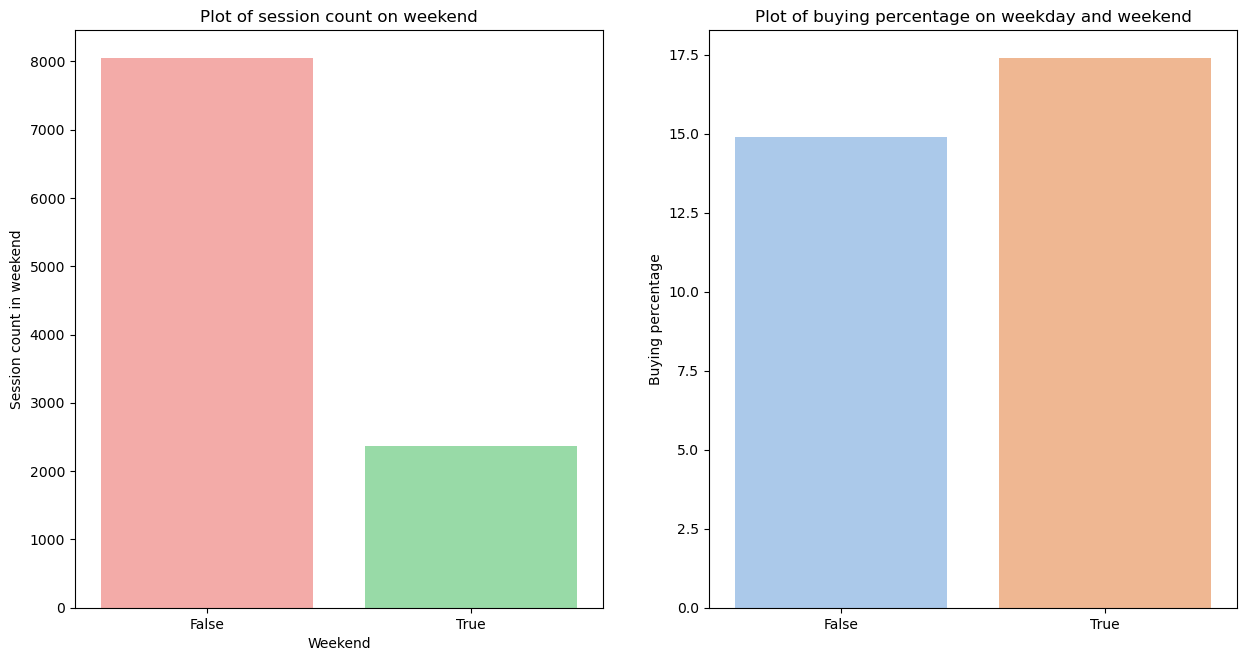

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors = sns.color_palette('pastel')[2:4][::-1]

# Aggregate session counts by Weekend status for 'NonBuyers' and 'Buyers'
# Assuming you have 'NonBuyers' and 'Buyers' as separate columns or need counts per 'Revenue' status
weekend_counts = shopping_dataset.groupby('Weekend')['Revenue'].value_counts().unstack().fillna(0)
weekend_counts.columns = ['NonBuyers', 'Buyers']

plt.figure(figsize=(15, 7.5))

# Plot for session count on weekends
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=weekend_counts.index, 
                  y=weekend_counts['NonBuyers'], 
                  palette=colors)
plt.ylabel("Session count in weekend")
ax1.set_title("Plot of session count on weekend")

# Plot for buying percentage on weekday and weekend
shopping_dataset['BuyersPct'] = shopping_dataset.groupby('Weekend')['Revenue'].transform(lambda x: x.mean() * 100)

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=shopping_dataset['Weekend'].unique(), 
                  y=shopping_dataset.groupby('Weekend')['BuyersPct'].first(),
                  palette='pastel')
plt.ylabel("Buying percentage")
ax2.set_title("Plot of buying percentage on weekday and weekend")

plt.show()

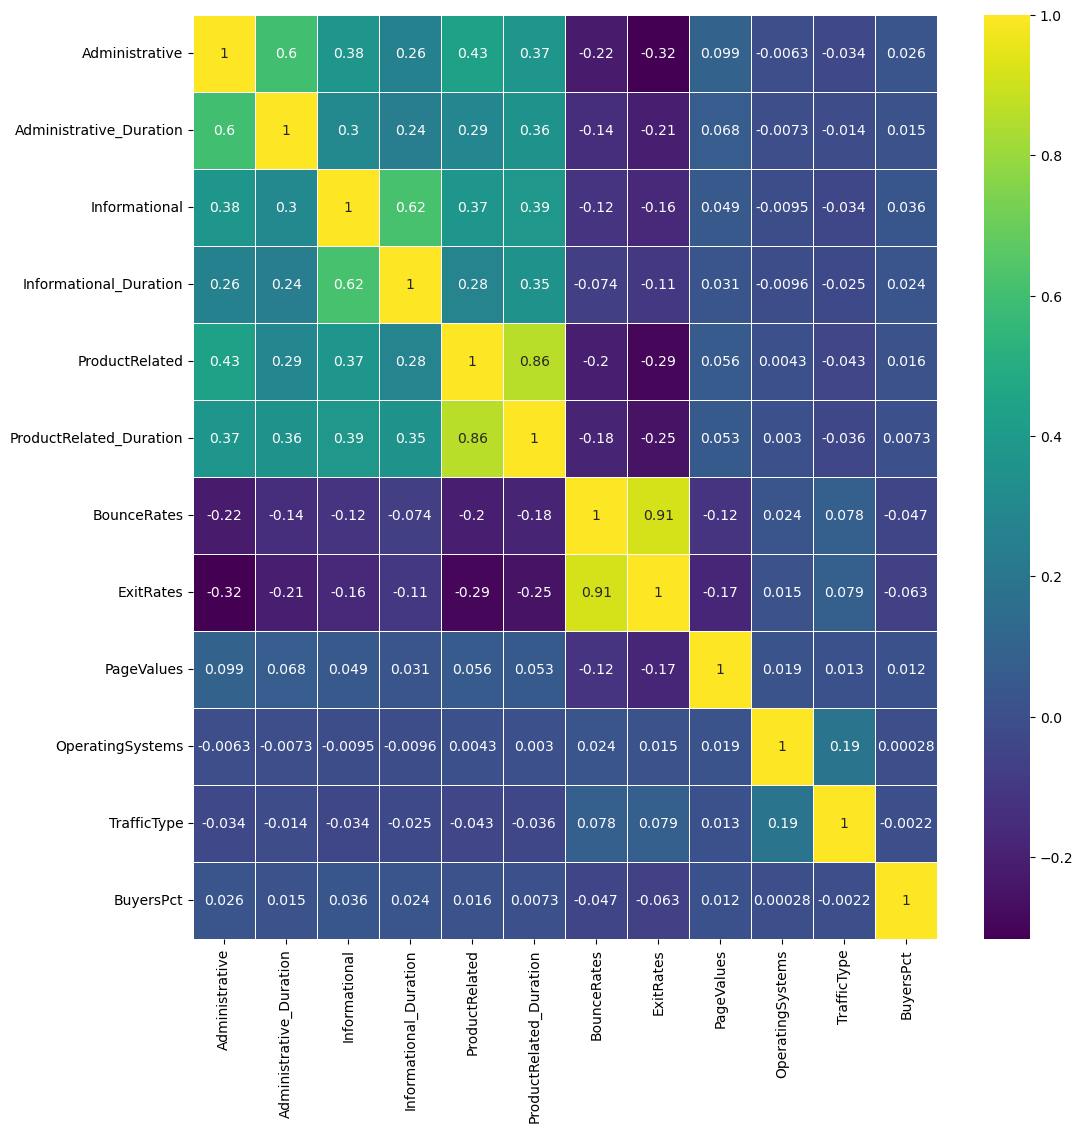

In [16]:
# Filter to only include numeric columns for correlation
numeric_shopping_dataset = shopping_dataset.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_shopping_dataset.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.show()

In [17]:
# Separate features and target
X = shopping_dataset.drop(['Revenue'], axis=1)
y = shopping_dataset['Revenue']

In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.8959178156258448
Confusion Matrix:
 [[2996  128]
 [ 257  318]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.71      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.8813192754798594
Confusion Matrix:
 [[3056   68]
 [ 371  204]]
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.75      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
Accuracy: 0.8959178156258448
Confusion Matrix:
 [[2977  147]
 [ 238  337]]
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [30]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM):
Accuracy: 0.8902406055690727
Confusion Matrix:
 [[3033   91]
 [ 315  260]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.74      0.45      0.56       575

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699



In [31]:
model_scores = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

print("\nModel Performance Comparison:")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")


Model Performance Comparison:
Random Forest: 0.8959
Logistic Regression: 0.8813
Gradient Boosting: 0.8959
SVM: 0.8902
